# Fourier Ptychography Workflow

This notebook demonstrates a full Fourier Ptychography workflow from end-to-end with `leb-freeze`.

In [1]:
from pathlib import Path

import numpy as np
from skimage import io

from leb.freeze import FPDataset, Pupil, PupilRecoveryMethod, fp_recover, load_dataset

## Load an image stack

First, load an image stack that is acquired using a Fourier Ptychography microscope. In this example, data was acquired with Micro-Manager and the LED coordinates that correspond to each image are embedded within the metadata.

In [2]:
image_stack = Path("led-array-datasets/fourier-ptychography/cos7-blue/cos7-blue_MMStack_Default.ome.tif")

# The LED matrix was rotated 90 degrees w.r.t. the table.
dataset = load_dataset(image_stack, rot_deg=90.0)
print(len(dataset))

36


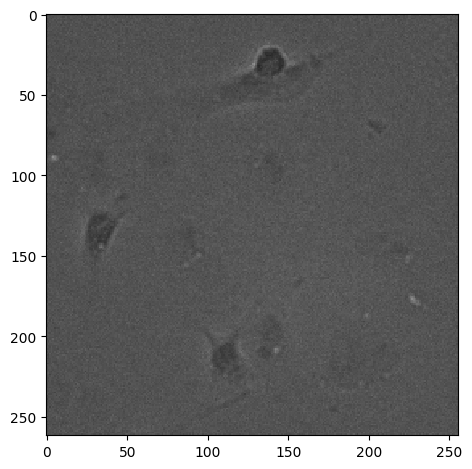

In [3]:
# Show the first image
io.imshow(dataset.images[0])
io.show()

## Slice the dataset

We can't use all the images, so let's take a subset of them. Any `FPDataset` can be sliced just like any Python collection.

In [4]:
# Take the first N images
new_dataset = dataset[:24]
print(len(new_dataset))

24


We can also crop the dataset using the `FPDataset.crop` method.

In [5]:
crop_size = 256
row_min, row_max = (new_dataset.shape[1] - crop_size) // 2, (new_dataset.shape[1] + crop_size) // 2
col_min, col_max = (new_dataset.shape[2] - crop_size) // 2, (new_dataset.shape[2] + crop_size) // 2
cropped_dataset = new_dataset.crop(row_min, row_max, col_min, col_max)

print(cropped_dataset.shape)


(24, 256, 256)


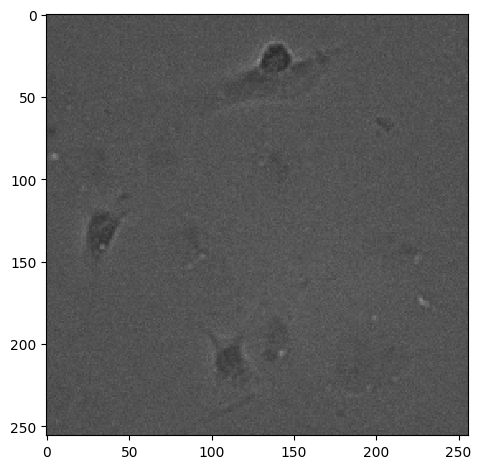

In [6]:
io.imshow(cropped_dataset.images[0])
io.show()

## Reconstruct the high resolution image

In [7]:
num_px = cropped_dataset.shape[1]
num_iterations = 50

input_pupil = Pupil.from_system_params(num_px=num_px, px_size_um=5.86)
obj, pupil = fp_recover(cropped_dataset, input_pupil, num_iterations, pupil_recovery_method=PupilRecoveryMethod.rPIE)

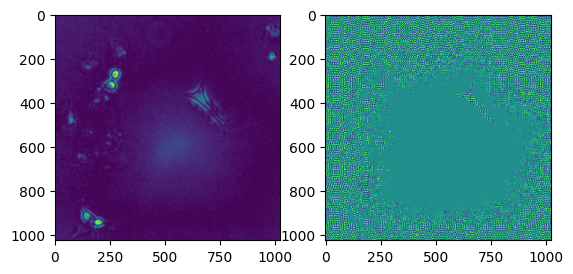

In [8]:
# Reconstructed object
io.imshow_collection((np.abs(obj), np.angle(obj)))
io.show()

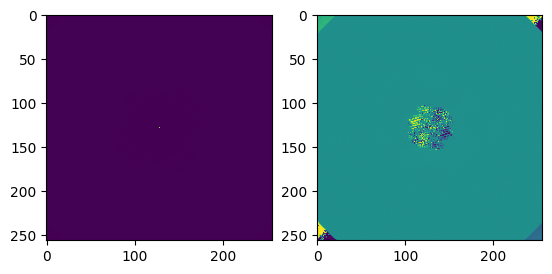

In [9]:
# Reconstructed pupil
io.imshow_collection((np.abs(pupil.p), np.angle(pupil.p)))
io.show()